In [29]:
%matplotlib inline
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math 
sns.set_style("darkgrid")

In [30]:
header_row = ['word','frequency']
data = pd.read_table('../Data/CountWordsNovels.txt', sep =' ',names=header_row)
# Add plus 1 to the rank since index starts from 0
data['rank'] = data.index + 1
data.head()

,word,frequency,rank
0,i,37789,1
1,he,27976,2
2,his,27824,3
3,had,20869,4
4,you,17540,5


In [45]:
def zipf(rank,a,b,c):
    return a * (rank + 5) ** c
popt, pcov = curve_fit(zipf, data['rank'], data['frequency'])

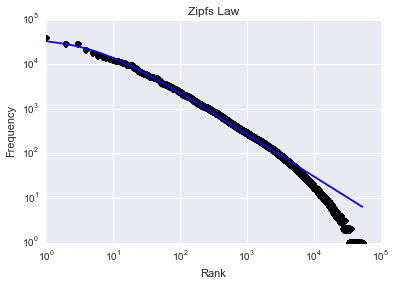

In [46]:
plt.title('Zipfs Law')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xscale('log')
plt.plot(data['rank'], data['frequency'], 'ko', label="Original Noised Data")
plt.plot(data['rank'], zipf(data['rank'],*popt), 'b-', label='fit')

In [53]:
heaps_data = pd.read_table('../Data/Occurences.txt', sep =',')

In [54]:
heaps_data.head()

,Number of novels,Distinct words,Word occurrences
0,5,23866,504762
1,10,27827,622554
2,15,34224,947652
3,20,40351,1146950
4,25,55392,1661664


In [55]:
def heaps(x, K, b):
    return K * x ** b
popt, pcov = curve_fit(heaps, heaps_data['Word occurrences'], heaps_data['Distinct words'])

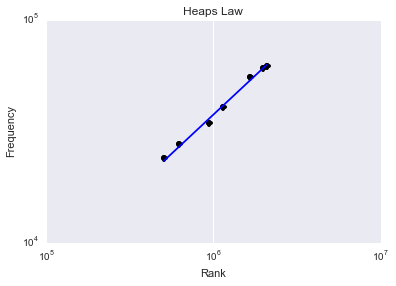

In [60]:
plt.title('Heaps Law')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.plot(heaps_data['Word occurrences'], heaps_data['Distinct words'], 'ko', label="Original Noised Data")
plt.plot(heaps_data['Word occurrences'], heaps(heaps_data['Word occurrences'],*popt), 'b-', label='fit')